# DSAA5020 Group Project:
## Corporaci-n-Favorita-Grocery-Sales-Forecasting

## Task1- EDA-Part 2: EDA on trunk data with identity data -- store.csv&items.csv

## 1. Preparation

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns
import missingno as msno
import os
from subprocess import check_output
from tqdm.notebook import tqdm
import datetime
import calendar
from sort_dataframeby_monthorweek import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Memory Menagement
def calculate_memory_usage(df):
    memory = round(df.memory_usage(index=True).sum(), 3)
    return memory / 1024**2

# Reproducing from: https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_memory_usage(df):
    """Reduce memory usage of DataFrame by modifying data types."""
    start_memory = df.memory_usage().sum() / 1024**2
    print('Initial Memory Usage: {:.3f} MB'.format(start_memory))
    
    for col in tqdm(df.columns):
        col_dtype = df[col].dtype
        
        if col_dtype != object and col_dtype.name != 'category' and 'datetime' not in col_dtype.name:
            min_val = df[col].min()
            max_val = df[col].max()
            
            if str(col_dtype)[:3] == 'int':
                int_types = [np.int8, np.int16, np.int32, np.int64]
                for int_type in int_types:
                    if min_val > np.iinfo(int_type).min and max_val < np.iinfo(int_type).max:
                        df[col] = df[col].astype(int_type)
                        break
            else:
                float_types = [np.float16, np.float32, np.float64]
                for float_type in float_types:
                    if min_val > np.finfo(float_type).min and max_val < np.finfo(float_type).max:
                        df[col] = df[col].astype(float_type)
                        break
        elif 'datetime' not in col_dtype.name:
            df[col] = df[col].astype('category')

    end_memory = df.memory_usage().sum() / 1024**2
    print('Memory after Optimization: {:.3f} MB'.format(end_memory))
    print('Reduced by {:.1f}%'.format(100 * (start_memory - end_memory) / start_memory))
    
    return df


## 2.  Load Data with Memory Menagement Methods

In [3]:
#Reading stores.csv
stores_file_path = '.\\raw_data\\stores.csv'
df_stores = pd.read_csv(stores_file_path)
print("Memory of Stores Dataframe --> %.3fMB"% calculate_memory_usage(df_stores))

Memory of Stores Dataframe --> 0.002MB


In [4]:
import gc
gc.collect()

0

In [5]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [6]:
df_stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [7]:
#Reading stores.csv
items_file_path = '.\\raw_data\\items.csv'
df_items = pd.read_csv(items_file_path)
print("Memory of Stores Dataframe --> %.3fMB"% calculate_memory_usage(df_stores))

Memory of Stores Dataframe --> 0.002MB


In [8]:
import gc
gc.collect()

0

In [9]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_nbr    4100 non-null   int64 
 1   family      4100 non-null   object
 2   class       4100 non-null   int64 
 3   perishable  4100 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 128.2+ KB


In [10]:
df_items

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1
...,...,...,...,...
4095,2132318,GROCERY I,1002,0
4096,2132945,GROCERY I,1026,0
4097,2132957,GROCERY I,1068,0
4098,2134058,BEVERAGES,1124,0


## 4. Basic EDA on Identity Data

### (1) Basic Exploration On Store

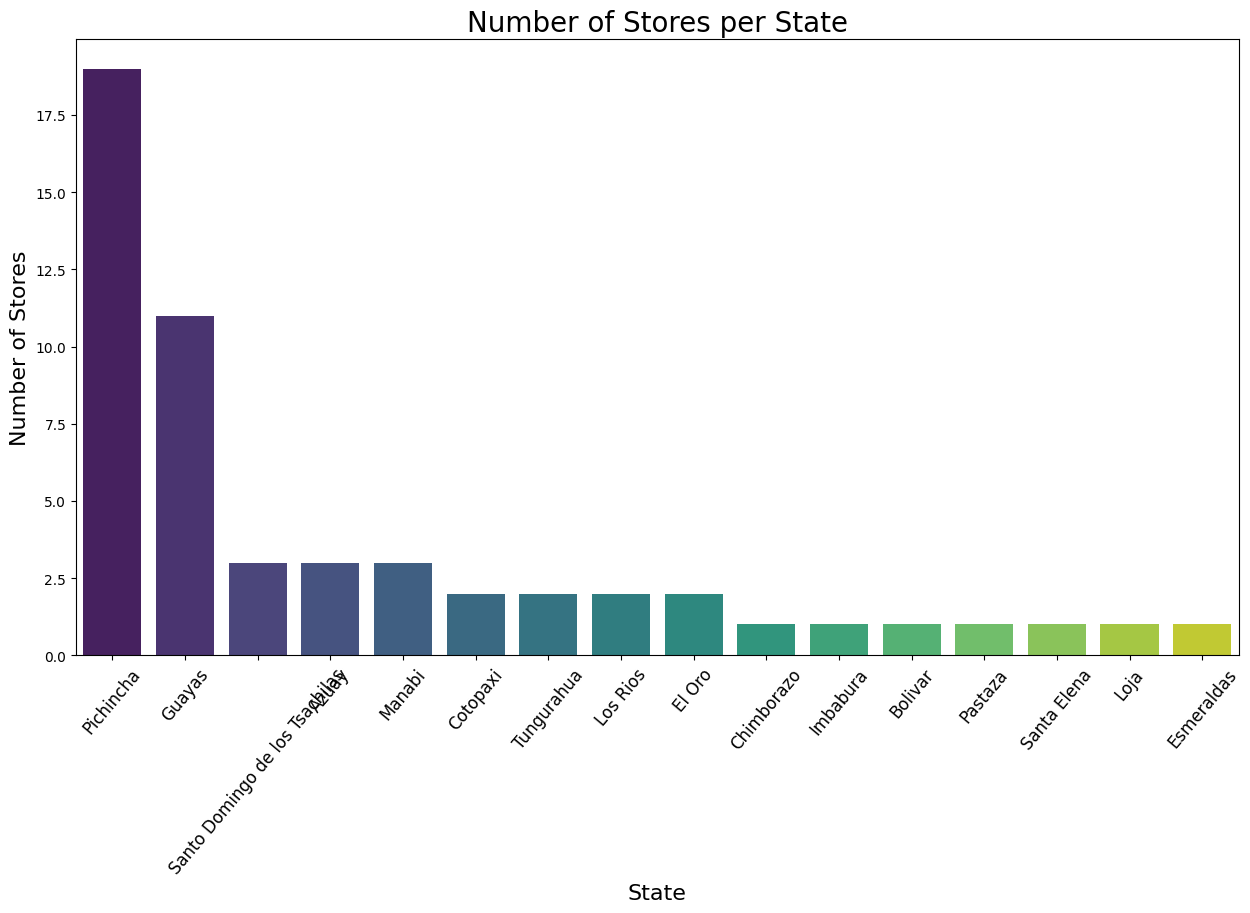

In [8]:
# Counting the number of stores in each state
stores_per_state = df_stores['state'].value_counts().to_frame().reset_index()
stores_per_state.columns = ['State', 'Number of Stores']

# Plotting state vs number of stores
plt.figure(figsize=(15, 8))
sns.barplot(x='State', y='Number of Stores', data=stores_per_state, palette='viridis')
plt.title('Number of Stores per State', fontsize=20)
plt.xlabel('State', fontsize=16)
plt.ylabel('Number of Stores', fontsize=16)
plt.xticks(rotation=50, fontsize=12)
plt.show()

# Clean up
del stores_per_state


In [9]:
import gc
gc.collect()

202

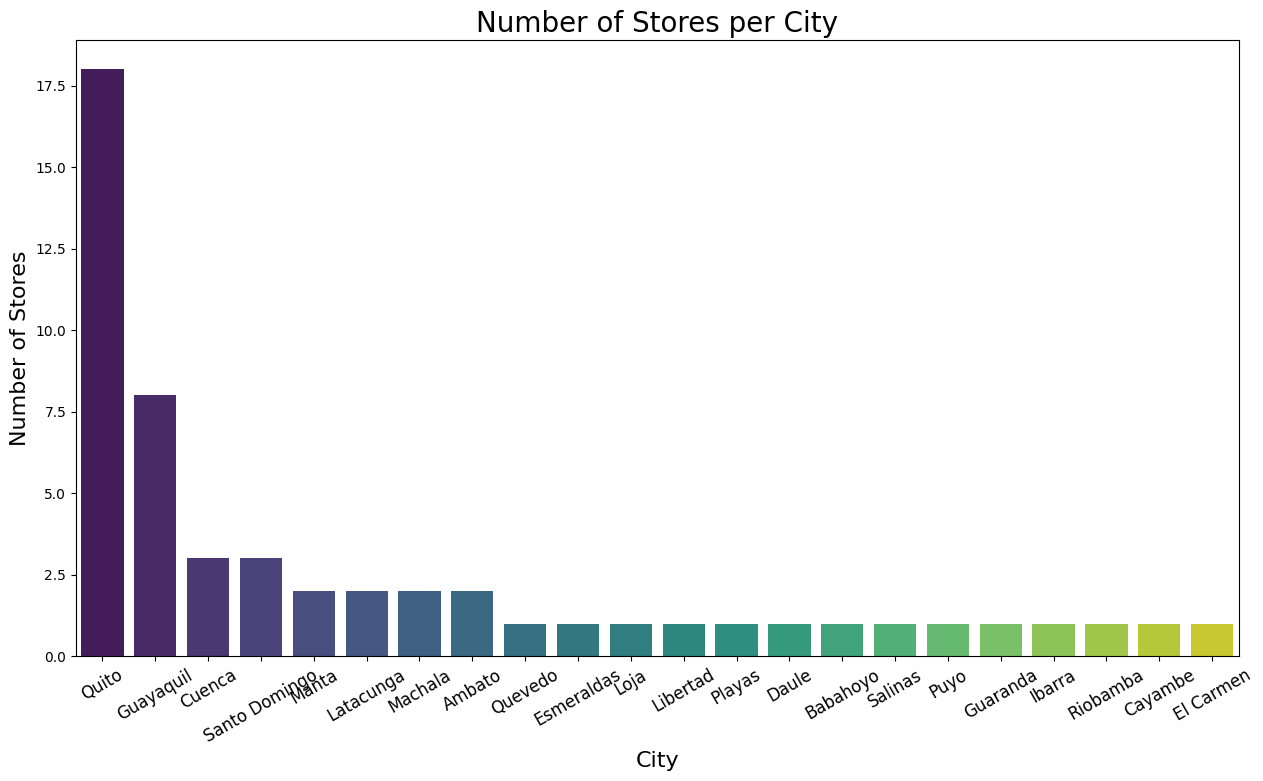

In [10]:
# Counting the number of stores in each city
stores_per_city = df_stores['city'].value_counts().to_frame().reset_index()
stores_per_city.columns = ['City', 'Number of Stores']

# Plotting city vs number of stores
plt.figure(figsize=(15, 8))
sns.barplot(x='City', y='Number of Stores', data=stores_per_city, palette='viridis')
plt.title('Number of Stores per City', fontsize=20)
plt.xlabel('City', fontsize=16)
plt.ylabel('Number of Stores', fontsize=16)
plt.xticks(rotation=30, fontsize=12)
plt.show()

# Clean up
del stores_per_city


In [11]:
import gc
gc.collect()

6609

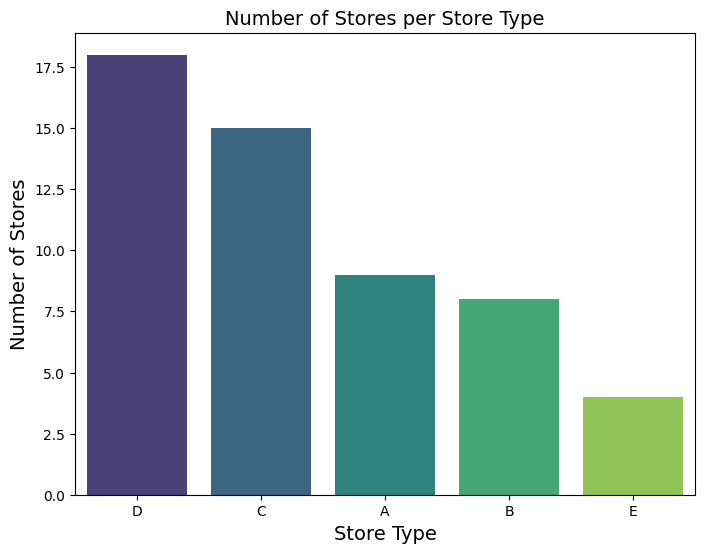

In [12]:
# Counting the number of stores for each store type
stores_per_type = df_stores['type'].value_counts().to_frame().reset_index()
stores_per_type.columns = ['Store_Type', 'Number of Stores']

# Plotting store type vs number of stores
plt.figure(figsize=(8, 6))
sns.barplot(x='Store_Type', y='Number of Stores', data=stores_per_type, palette='viridis')
plt.title("Number of Stores per Store Type", fontsize=14)
plt.xlabel('Store Type', fontsize=14)
plt.ylabel('Number of Stores', fontsize=14)
plt.show()

# Clean up
del stores_per_type


In [13]:
import gc
gc.collect()

7970

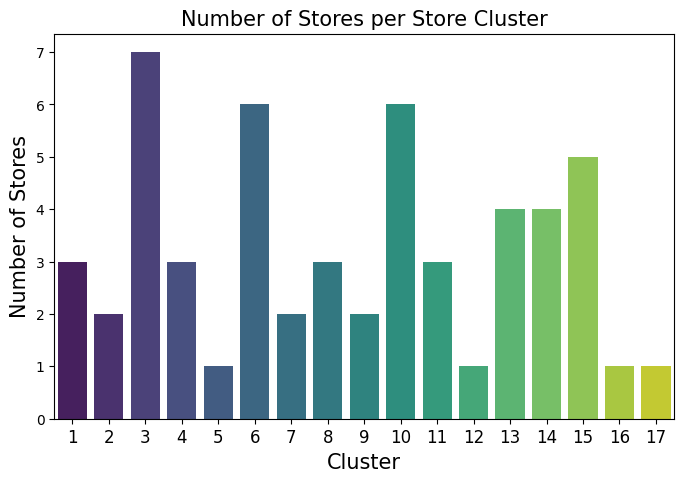

In [14]:
# Counting the number of stores for each store cluster
stores_per_cluster = df_stores['cluster'].value_counts().to_frame().reset_index()
stores_per_cluster.columns = ['Cluster', 'Number of Stores']

# Plotting store cluster vs number of stores
plt.figure(figsize=(8, 5))
sns.barplot(x='Cluster', y='Number of Stores', data=stores_per_cluster, palette='viridis')
plt.title("Number of Stores per Store Cluster", fontsize=15)
plt.xlabel('Cluster', fontsize=15)
plt.ylabel('Number of Stores', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.show()

# Clean up
del stores_per_cluster

In [15]:
import gc
gc.collect()

3915

### (2) Basic Exploration On Item

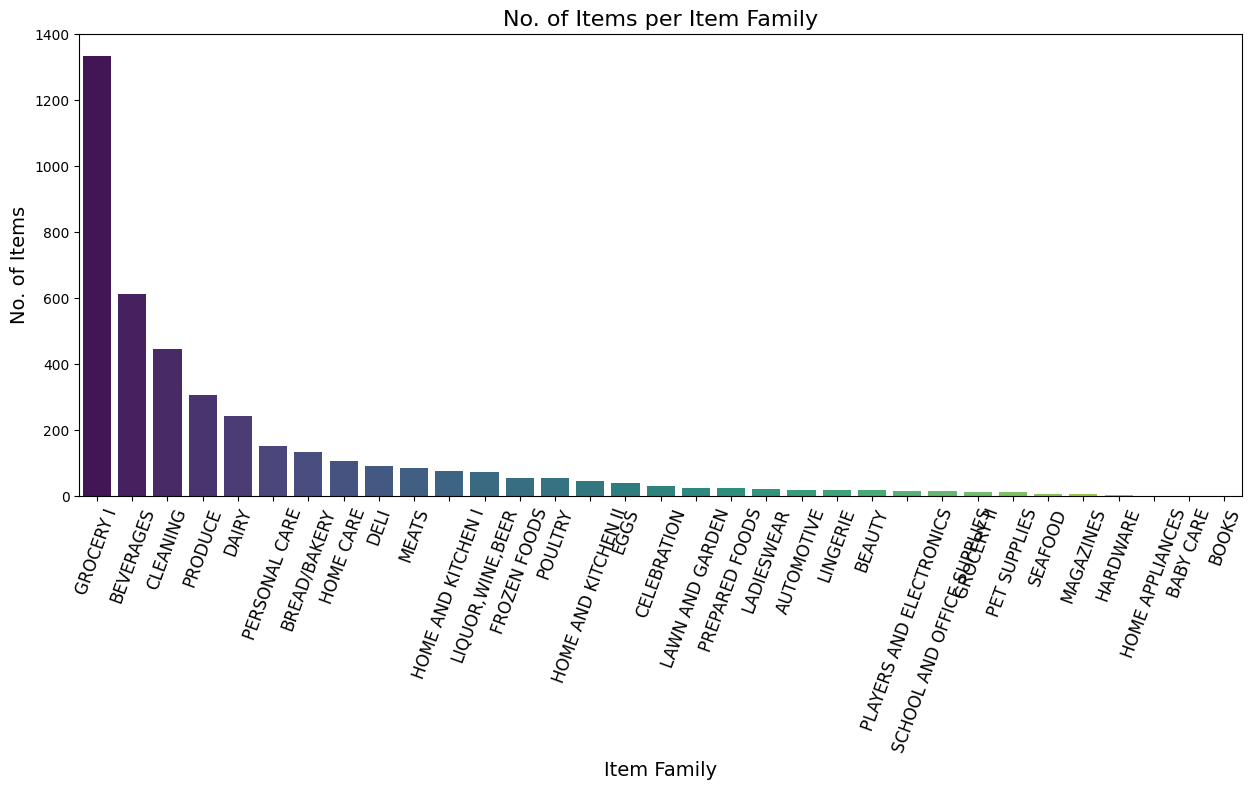

In [20]:
# Counting the number of items in each item family
items_per_family = df_items['family'].value_counts().to_frame().reset_index()
items_per_family.columns = ['Item Family', 'Number of Items']

# Plotting item family vs number of items
plt.figure(figsize=(15, 6))
sns.barplot(x='Item Family', y='Number of Items', data=items_per_family, palette='viridis')
plt.ylabel('No. of Items', fontsize=14)
plt.xlabel('Item Family', fontsize=14)
plt.title('No. of Items per Item Family', fontsize=16)
plt.xticks(rotation=70, fontsize=12)
plt.show()

# Clean up
del items_per_family


In [21]:
import gc
gc.collect()

269

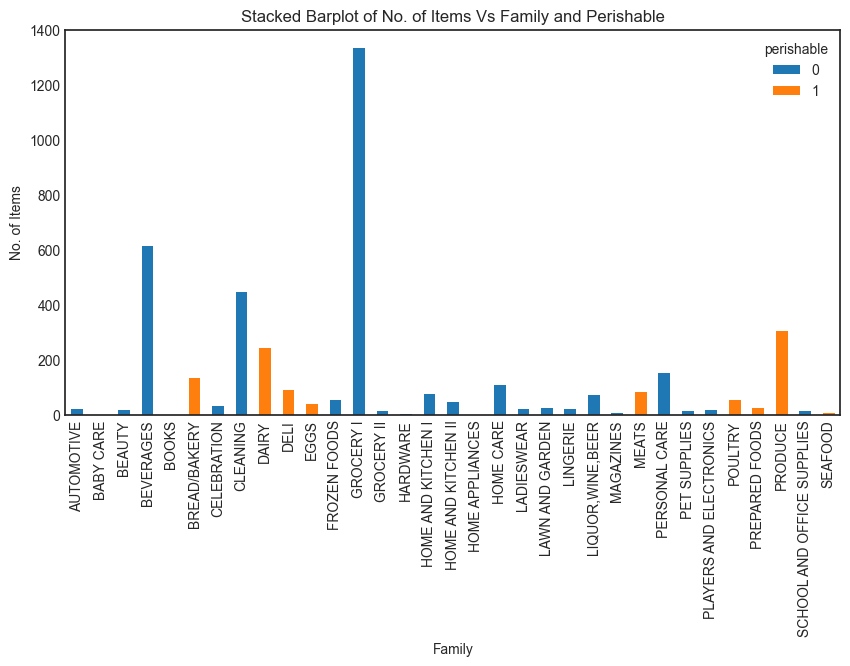

In [22]:
# Grouping by 'family' and 'perishable' feature to count the number of items
items_grouped = df_items.groupby(['family', 'perishable']).size().unstack()

# Plotting a stacked barplot for 'family' and 'perishable' vs number of items
plt.style.use('seaborn-white')
items_grouped.plot(kind='bar', stacked=True, figsize=(10, 5), grid=False)
plt.title('Stacked Barplot of No. of Items Vs Family and Perishable')
plt.xlabel('Family')
plt.ylabel('No. of Items')
plt.show()

# Clean up
del items_grouped


In [23]:
import gc
gc.collect()

20205

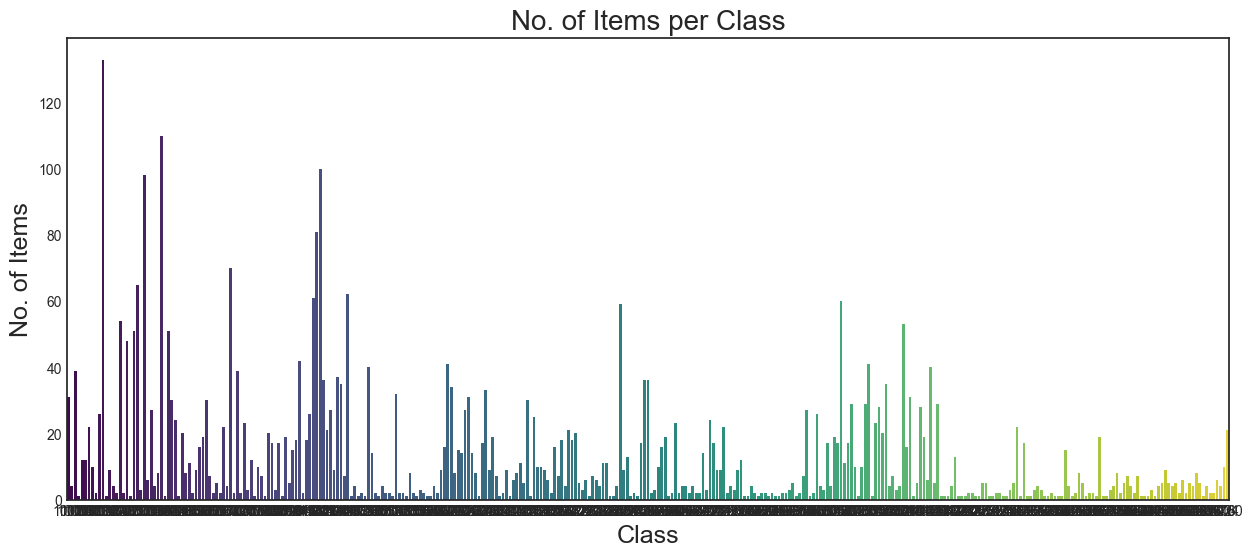

In [24]:
# Counting the number of items in each item class
items_per_class = df_items['class'].value_counts().to_frame().reset_index()
items_per_class.columns = ['Class', 'Number of Items']

# Plotting item class vs number of items
plt.figure(figsize=(15, 6))
sns.barplot(x='Class', y='Number of Items', data=items_per_class, palette='viridis')
plt.title('No. of Items per Class', fontsize=20)
plt.xlabel('Class', fontsize=18)
plt.ylabel('No. of Items', fontsize=18)
plt.show()

# Clean up
del items_per_class


In [25]:
import gc
gc.collect()

516

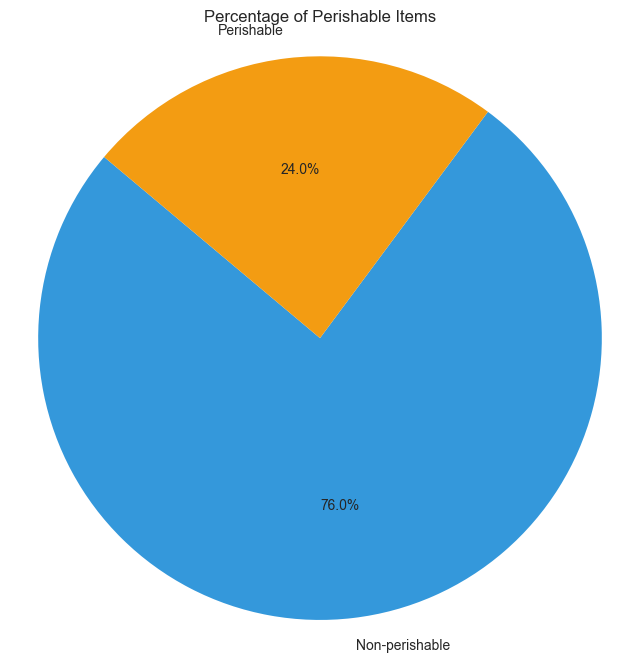

In [26]:
# Calculating the counts of perishable and non-perishable items
perishable_counts = df_items['perishable'].value_counts()

# Creating labels for the pie chart
labels = ['Non-perishable', 'Perishable']

# Creating colors for each section of the pie chart
colors = ['#3498DB', '#F39C12']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(perishable_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Perishable Items')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [27]:
import gc
gc.collect()

82321

## 5. EDA on Trunk Data with the applied information of Identity Data

EDA from all features to label, with label:
$$y = unit\_sales$$

In [37]:
def plot_sales_per_category(data, category, category_label, title):
    sales_per_category = data.groupby([category], as_index=False).agg({'unit_sales':'sum'})
    plt.figure(figsize=(15, 6))
    sns.barplot(x=category, y='unit_sales', data=sales_per_category, palette='viridis')
    plt.title(title, fontsize=20)
    plt.xlabel(category_label, fontsize=18)
    plt.ylabel('Sales', fontsize=18)
    plt.xticks(rotation=70, fontsize=12)
    plt.show()
    del sales_per_category
    gc.collect()

In [11]:
# Reading and optimizing test data
test_file_path = '.\\raw_data\\test.csv'
df_test = pd.read_csv(test_file_path)

# Storing optimized data types of test dataframe for loading the train dataframe
dtypes_dict = dict(df_test.dtypes)
del dtypes_dict['date'], dtypes_dict['onpromotion']
del df_test
import gc
gc.collect()

# Loading train data with optimized data types from test dataframe
train_file_path = '.\\raw_data\\train.csv'
df_train = pd.read_csv(train_file_path, parse_dates=['date'], dtype=dtypes_dict)

# Reducing memory usage of train dataframe
df_train = reduce_memory_usage(df_train)

#Filtering data having year = 2016 only
df_train=df_train[df_train["date"].dt.year==2016]

import gc
gc.collect()

# Merging store dataframe with sales dataframe
store_sales = df_train.merge(df_stores, how='inner', on='store_nbr')
store_sales = reduce_memory_usage(store_sales)
print("Memory of store_sales Dataframe: %.3f MB" % calculate_memory_usage(store_sales))

#Merging items dataframe and sales dataframe
item_sales= df_train.merge(df_items, how='inner', on='item_nbr')
item_sales= reduce_memory_usage(item_sales)
print("Memory of item_sales Dataframe: %.3f MB" % calculate_memory_usage(item_sales))

del df_train
import gc
gc.collect()

Initial Memory Usage: 5744.799 MB


  0%|          | 0/6 [00:00<?, ?it/s]

Memory after Optimization: 2633.033 MB
Reduced by 54.2%
Initial Memory Usage: 1814.283 MB


  0%|          | 0/10 [00:00<?, ?it/s]

Memory after Optimization: 873.545 MB
Reduced by 51.9%
Memory of store_sales Dataframe: 873.545 MB
Initial Memory Usage: 1545.500 MB


  0%|          | 0/9 [00:00<?, ?it/s]

Memory after Optimization: 873.545 MB
Reduced by 43.5%
Memory of item_sales Dataframe: 873.545 MB


### (1) x = State

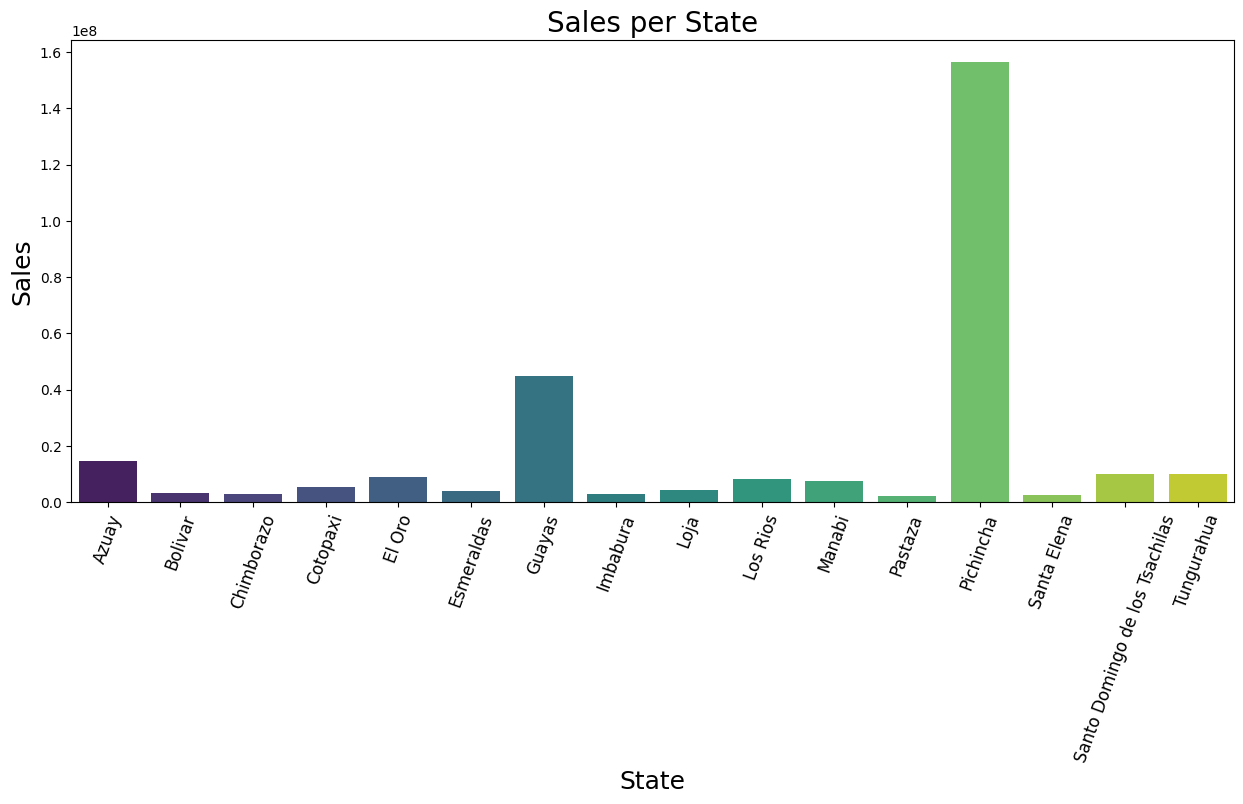

In [38]:
# Plotting sales per state
plot_sales_per_category(store_sales, 'state', 'State', 'Sales per State')

### (2) x = City

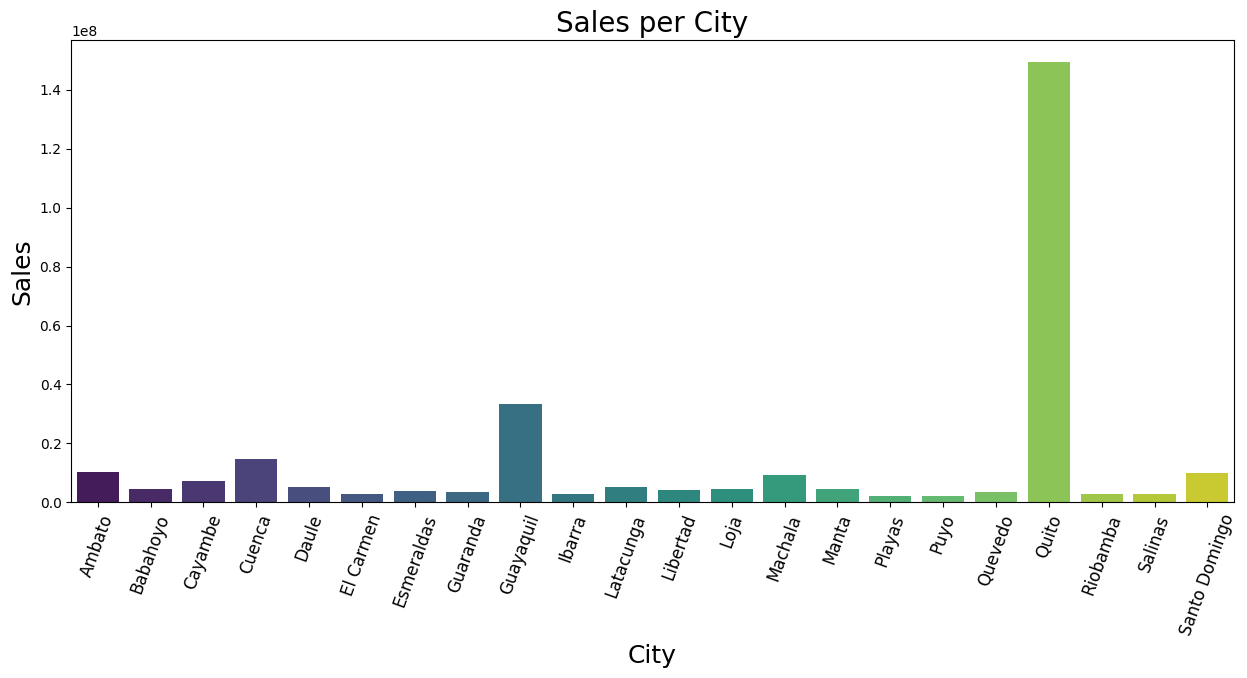

In [39]:
# Plotting sales per city
plot_sales_per_category(store_sales, 'city', 'City', 'Sales per City')

### (3) x = Store Type

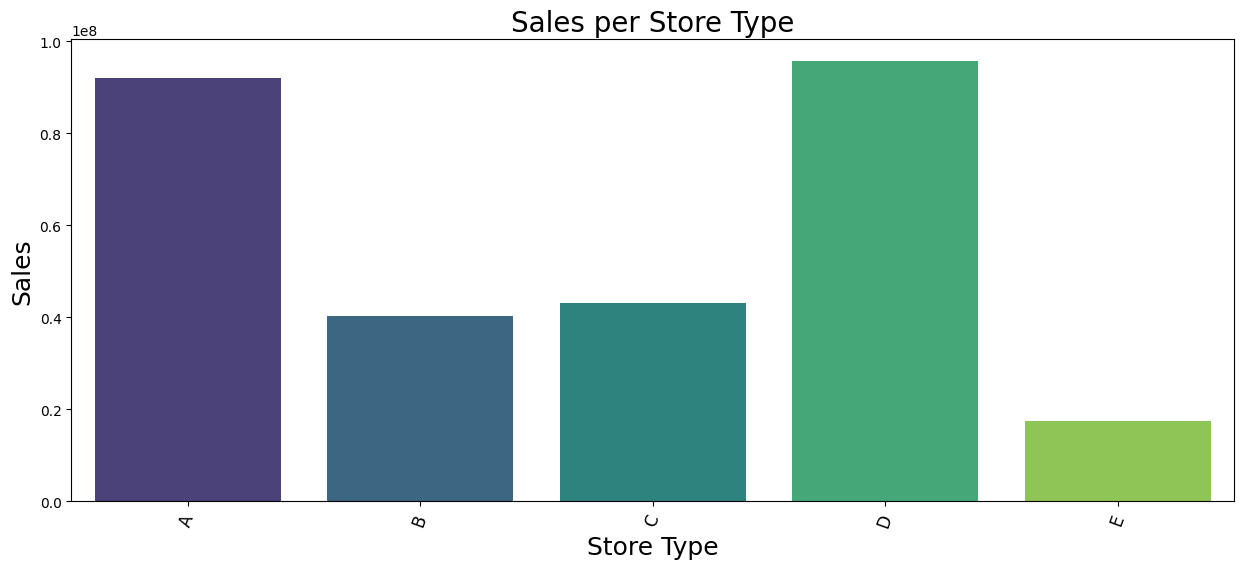

In [40]:
# Plotting sales per store type
plot_sales_per_category(store_sales, 'type', 'Store Type', 'Sales per Store Type')

### (4) x = Cluster

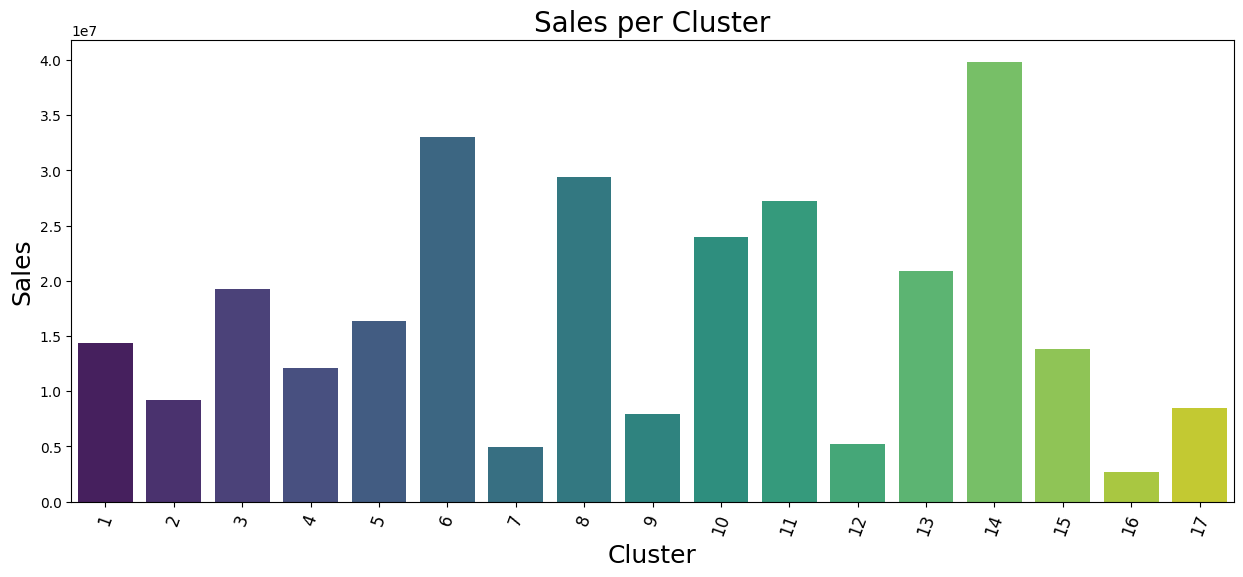

In [41]:
# Plotting sales per store cluster
plot_sales_per_category(store_sales, 'cluster', 'Cluster', 'Sales per Cluster')

### (5) x = Item Family

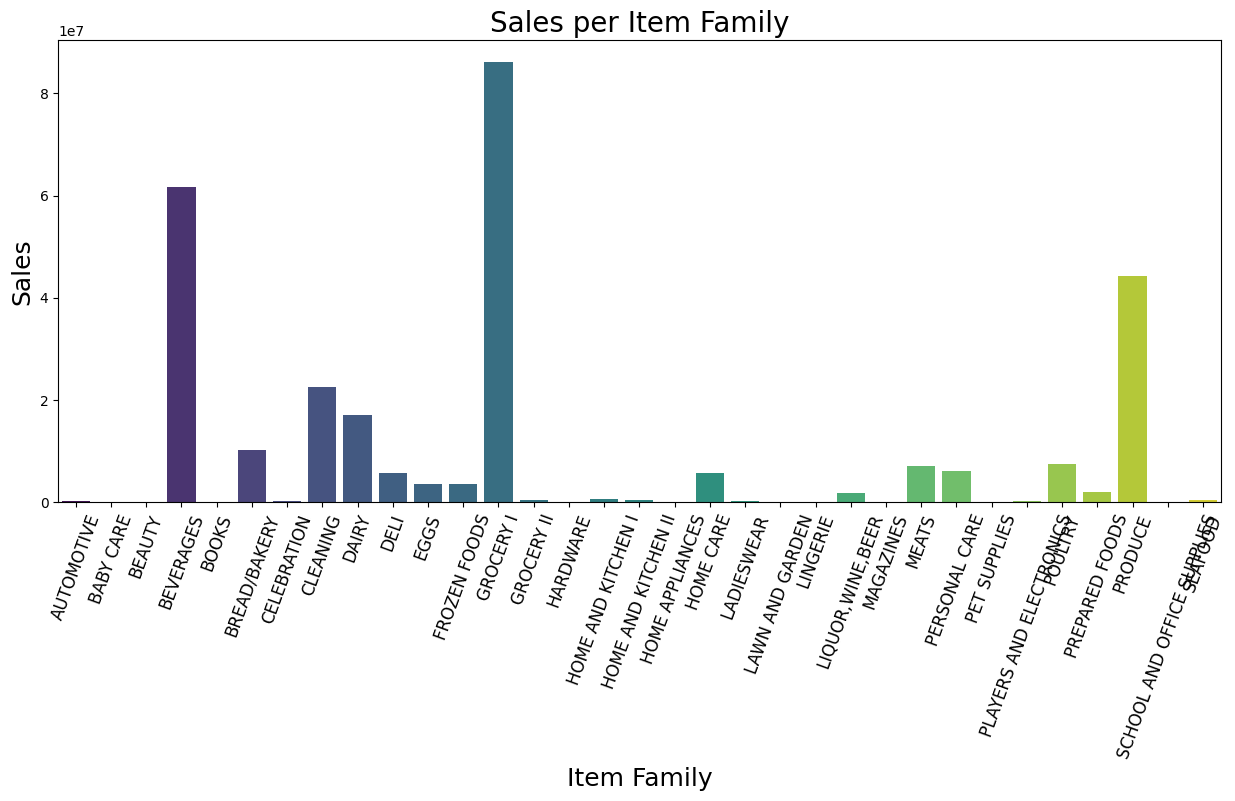

In [42]:
# Grouping by item family and plotting sales
plot_sales_per_category(item_sales, 'family', 'Item Family', 'Sales per Item Family')

### (6) x = Item Class

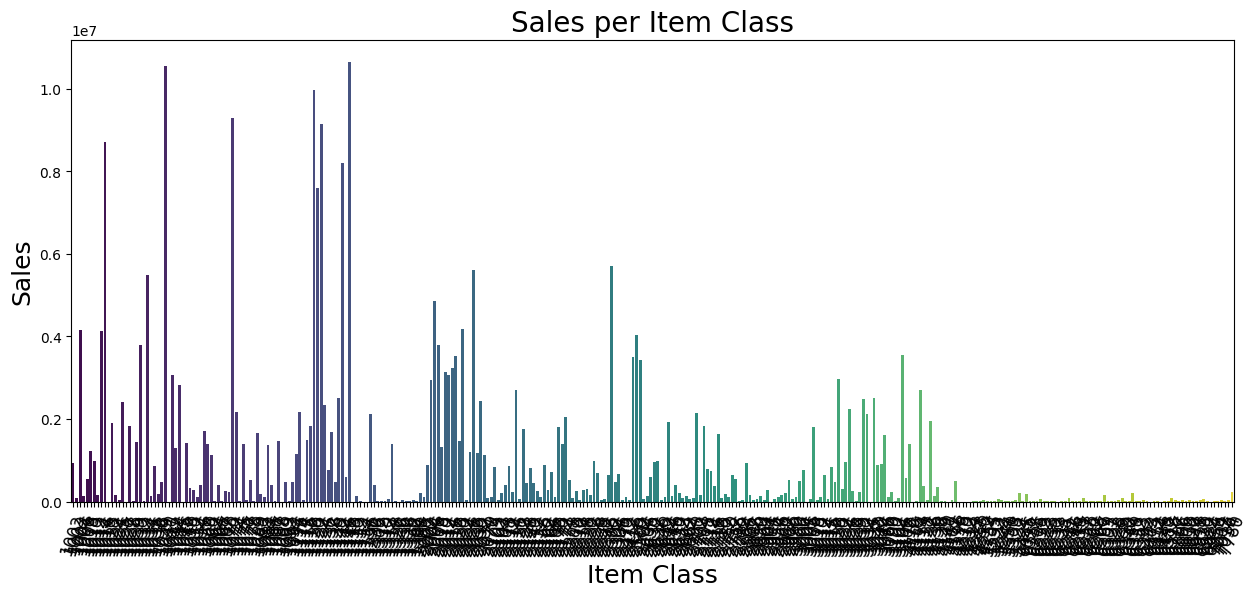

In [43]:
# Grouping by item class and plotting sales
plot_sales_per_category(item_sales, 'class', 'Item Class', 'Sales per Item Class')

### (7) x = Perishable

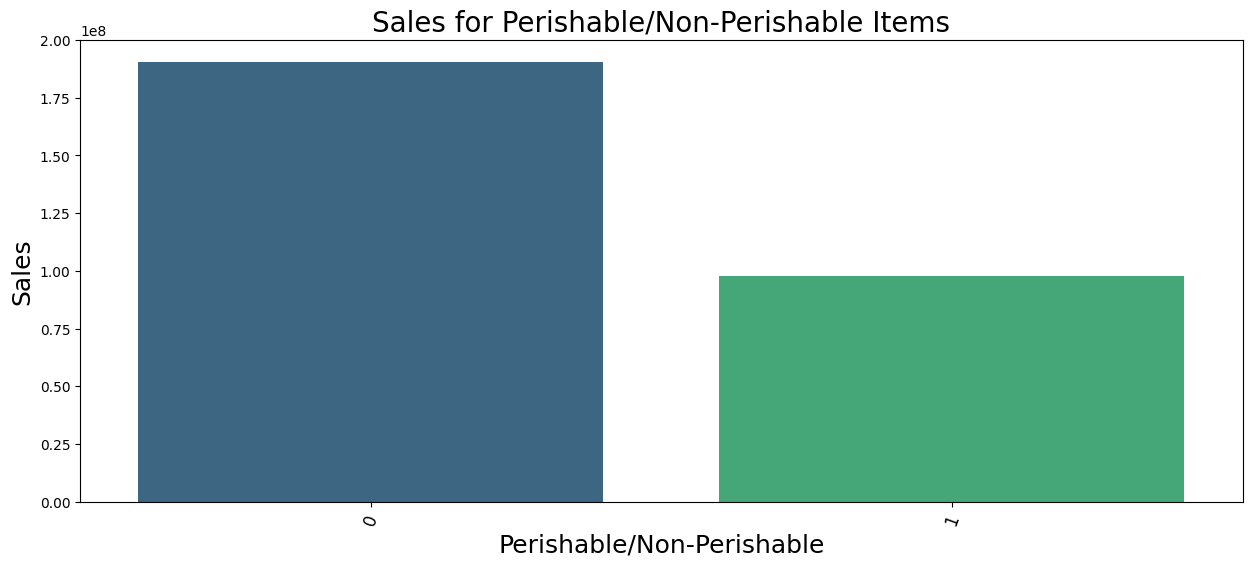

In [44]:
# Grouping by perishable feature and plotting sales for perishable/non-perishable items
plot_sales_per_category(item_sales, 'perishable', 'Perishable/Non-Perishable', 'Sales for Perishable/Non-Perishable Items')